## Ploting de gráfico

Plotando gráfico da equação
$$
\frac{H²}{H_0²} = \frac{\Omega_{r,0}}{a^4}+ \frac{\Omega_{m,0}}{a³} + \Omega_{\Lambda , 0} + \frac{(1-\Omega_{0})}{a²}
$$

tal que

$$
a = 1+z
$$

In [2]:
#Pré configuração para gráfico

%matplotlib inline
%config InlineBackend.figure_format = 'svg'





#Bibliotecas para plotting
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate as  itg
import numpy as np
import pandas as pd
import math
import warnings
from scipy.stats import chisquare
from scipy.stats import norm
import scipy.optimize as opt
from scipy.optimize import minimize

exp = np.exp
pi = np.pi
ln = np.log


k2 = 8*np.pi*6.67e-11
lbd = 0.1
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Definindo a função

def omega_m(lna):
    H0 = 67.66
    O_m = .306*(H0**2) * (exp(-3*lna)) * (H(lna)**-2)
    return O_m

def Omega_m(z):
    Omega_m0 = 0.311
    Om_0 = Omega_m0*(1+z)**3
    return Om_0

def H_LCDM(z, Omega_m0):
    #c = 3 * 10**(8)
    #k = -1
    Omega_L = 0.679
    Omega_k0 = 1 - Omega_m0 - Omega_L
    #Omega_k0 = - k /(c**2) 
    #Omega_k0 = -0.6
    Omega_r0 = 0
    #Omega_L = 0.679
    #Omega_m0 = 0.311
    H0 = 67.66
    H_LCDM = H0*(Omega_L + Omega_k0 * (1+z)**2 + Omega_m0* (1+z)**3 + Omega_r0*(1+z)**4)**(1/2) 
    return H_LCDM

def f_param(z):
    gamma = 6./11.
    #f_p = Omega_m(z) ** gamma


print(H_LCDM(0, 0.311))
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

67.66


         z      H  error_H
0   0.0700   69.0     19.6
1   0.0900   69.0     12.0
2   0.1200   68.6     26.2
3   0.1700   83.0      8.0
4   0.1790   75.0      4.0
5   0.1990   75.0      5.0
6   0.2000   72.9     29.6
7   0.2700   77.0     14.0
8   0.2800   88.8     36.6
9   0.3520   83.0     14.0
10  0.3802   83.0     13.5
11  0.4000   95.0     17.0
12  0.4004   77.0     10.2
13  0.4247   87.1     11.2
14  0.4497   92.8     12.9
15  0.4700   89.0     49.6
16  0.4783   80.9      9.0
17  0.4800   97.0     62.0
18  0.5930  104.0     13.0
19  0.6800   92.0      8.0
20  0.7810  105.0     12.0
21  0.8750  125.0     17.0
22  0.8800   90.0     40.0
23  0.9000  117.0     23.0
24  1.0370  154.0     20.0
25  1.3000  168.0     17.0
26  1.3630  160.0     33.6
27  1.4300  177.0     18.0
28  1.5300  140.0     14.0
29  1.7500  202.0     40.0
30  1.9650  186.5     50.4


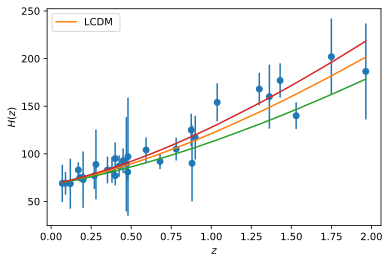

In [4]:
#Inserindo Arquivo .CSV

myfile_H = pd.read_csv(r'/home/cordoeira/Documentos/Dados_Planck/H(z).txt', header = None,sep='\s\s+',engine='python')

myfile_H.columns = ['z','H','error_H']

Hdata = pd.DataFrame(myfile_H)
print(Hdata)

fig1 = plt.figure()
xdata = Hdata["z"]
ydata = Hdata["H"]
errordata = Hdata["error_H"]
plt.scatter(xdata, ydata)
plt.errorbar(xdata, ydata, errordata, linestyle = "None")
#plt.plot(xdata, H_z(xdata, 67.36, 0.311))
plt.plot(xdata, H_LCDM(xdata, 0.311))
plt.plot(xdata, H_LCDM(xdata, 0.2))
plt.plot(xdata, H_LCDM(xdata, 0.4))
#plt.title('$H_0$ = 67.36, $\Omega_{m0} = 0.311$, $\lambda$ = 0.1')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(["LCDM "],loc = "upper left")
#fig = plt.gcf()
plt.show()
#fig1.savefig("H(z)_data.png")
#plt.savefig('H(z)_data.png', format = 'png')
#print("figuraH")


In [5]:
# Chi Quadrado para comparaçao do LCDM:


myfile_H = pd.read_csv(r'/home/cordoeira/Documentos/Dados_Planck/H(z).txt', header = None,sep='\s\s+',engine='python')

myfile_H.columns = ['z','H','error_H']

Hdata = pd.DataFrame(myfile_H)

H_obs = Hdata["H"]
z_dado = Hdata["z"]
sigma_OHD = Hdata["error_H"]
Omega_m0 = 0.311

print(H_obs)


0      69.0
1      69.0
2      68.6
3      83.0
4      75.0
5      75.0
6      72.9
7      77.0
8      88.8
9      83.0
10     83.0
11     95.0
12     77.0
13     87.1
14     92.8
15     89.0
16     80.9
17     97.0
18    104.0
19     92.0
20    105.0
21    125.0
22     90.0
23    117.0
24    154.0
25    168.0
26    160.0
27    177.0
28    140.0
29    202.0
30    186.5
Name: H, dtype: float64


In [6]:
#for z in np.linspace (0, 1):
   # print(H_LCDM(z, 0.311))
    
print(H_LCDM(z_dado, 0.311))

0      70.035041
1      70.756802
2      71.875069
3      73.832861
4      74.197616
5      75.021535
6      75.063213
7      78.093127
8      78.543856
9      81.917834
10     83.299746
11     84.289914
12     84.310085
13     85.547814
14     86.846303
15     87.919156
16     88.362531
17     88.453678
18     94.762321
19     99.941666
20    106.285230
21    112.490831
22    112.828746
23    114.188132
24    123.822384
25    143.780875
26    148.826017
27    154.296832
28    162.657639
29    181.833693
30    201.547689
Name: z, dtype: float64


In [13]:
#print(H_obs)
print(H_LCDM(z_dado, 0.311) - H_obs)
print(sigma_OHD)


def chisqfunc(z_dado,Omega_m0):
    model = H_LCDM(z_dado,Omega_m0)
    chisq2 = np.sum(((H_obs - model)/sigma_OHD)**2)
    return chisq2

if chisqfunc == 0.01:
    print(chisqfunc(0.2,0.311))

0      1.035041
1      1.756802
2      3.275069
3     -9.167139
4     -0.802384
5      0.021535
6      2.163213
7      1.093127
8    -10.256144
9     -1.082166
10     0.299746
11   -10.710086
12     7.310085
13    -1.552186
14    -5.953697
15    -1.080844
16     7.462531
17    -8.546322
18    -9.237679
19     7.941666
20     1.285230
21   -12.509169
22    22.828746
23    -2.811868
24   -30.177616
25   -24.219125
26   -11.173983
27   -22.703168
28    22.657639
29   -20.166307
30    15.047689
dtype: float64
0     19.6
1     12.0
2     26.2
3      8.0
4      4.0
5      5.0
6     29.6
7     14.0
8     36.6
9     14.0
10    13.5
11    17.0
12    10.2
13    11.2
14    12.9
15    49.6
16     9.0
17    62.0
18    13.0
19     8.0
20    12.0
21    17.0
22    40.0
23    23.0
24    20.0
25    17.0
26    33.6
27    18.0
28    14.0
29    40.0
30    50.4
Name: error_H, dtype: float64


In [19]:
def log_likelihood(theta, xdata, ydata, errordata):
    m, b, log_f = theta
    model = H_LCDM(xdata, 0.311)
    sigma2 = errordata ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * chisq2

In [22]:
from scipy.optimize import minimize

m_true = H_LCDM(z_dado, 0.311)
b_true = H_LCDM(0, 0.311)
f_true = 0.5


np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
#initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(xdata, ydata, errordata))
m_ml, b_ml, log_f_ml = soln.xdata

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(xdata, y, errordata, fmt=".k", capsize=0)
plt.plot(xdata, H_LCDM(xdata, 0.311))
plt.plot(xdata, H_LCDM(xdata, 0.2))
plt.plot(xdata, H_LCDM(xdata, 0.4))
plt.plot(xdata, np.dot(np.vander(xdata, 2), [m_ml, b_ml]), ":k", label="ML")
#plt.title('$H_0$ = 67.36, $\Omega_{m0} = 0.311$, $\lambda$ = 0.1')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(["LCDM "],loc = "upper left")
#fig = plt.gcf()
plt.show()
#fig1.savefig("H(z)_data.png")
#plt.savefig('H(z)_data.png', format = 'png')
#print("figuraH")


ValueError: setting an array element with a sequence.